# HW Day #8 EQ 회귀

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 파일 읽기
 - EQ_Analysis_대체_X.csv을 읽어서 df_x 저장한 후 출력하세요.
 - EQ_Analysis_대체_Y.xlsx을 읽어서 df_y 저장한 후 출력하세요.

In [149]:
# Code here
df_x = pd.read_csv('EQ_Analysis_대체_X.csv')
df_x

,D1,D2,D3,D4,D5,A1,A2,A3,A4,A5,...,A188,A189,A190,A191,A192,A193,A194,A195,A196,A197
0,14,4DR,RJM11,3,RJM11.03,CHAMBER1,NaN,56.933333,EQ1,RECIPE1,...,NaN,82.133333,EQ1,RECIPE3,NaN,CHAMBER1,NaN,19.233333,EQ1,NaN
1,14,4DR,RJE30,13,RJE30.13,CHAMBER2,NaN,43.033333,EQ2,RECIPE1,...,NaN,126.333333,EQ2,RECIPE1,NaN,CHAMBER2,NaN,37.266667,EQ2,NaN
2,14,4DR,RJ894,13,RJ894.13,CHAMBER3,NaN,60.300000,EQ3,RECIPE1,...,NaN,71.600000,EQ1,RECIPE1,NaN,CHAMBER3,NaN,118.866667,EQ3,NaN
3,14,4DR,RJ071,8,RJ071.08,CHAMBER2,NaN,76.750000,EQ2,RECIPE1,...,NaN,265.050000,EQ1,RECIPE1,NaN,CHAMBER4,NaN,12.066667,EQ1,NaN
4,14,4DR,RHK88,5,RHK88.05,CHAMBER1,NaN,46.300000,EQ1,RECIPE1,...,NaN,100.000000,EQ3,RECIPE1,NaN,CHAMBER5,NaN,31.050000,EQ3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,14,4DR,RJ900,13,RJ900.13,4PMCC312_,NaN,224.900000,4PMCC312,DA-LO-M3C-SOC1B,...,NaN,181.966667,EQ4,RECIPE1,NaN,CHAMBER7,NaN,16.300000,EQ1,NaN
2374,14,4DR,RJM85,5,RJM85.05,4PMCC312_,NaN,74.533333,4PMCC312,DA-LO-M3C-SOC1B,...,NaN,125.266667,EQ2,RECIPE1,NaN,CHAMBER1,NaN,18.900000,EQ1,NaN
2375,14,4DR,RJJ08,7,RJJ08.07,4PMCC312_,NaN,90.883333,4PMCC312,DA-LO-M3C-SOC1B,...,NaN,152.250000,EQ3,RECIPE1,NaN,CHAMBER7,NaN,33.883333,EQ1,NaN
2376,14,4DR,RJE51,4,RJE51.04,4PMCC312_,NaN,422.883333,4PMCC312,DA-LO-M3C-SOC1B,...,NaN,221.850000,EQ3,RECIPE1,NaN,CHAMBER6,NaN,271.333333,EQ3,NaN


In [150]:
# Code here
df_y = pd.read_excel('EQ_Analysis_대체_Y.xlsx')
df_y

,D3,D4,D5,Y,Y_TIME
0,RJM11,3,RJM11.03,0.598444,2019-11-26 오후 2:40:14
1,RJE30,13,RJE30.13,0.808042,2019-11-17 오후 1:38:43
2,RJ894,13,RJ894.13,0.725076,2019-11-24 오후 9:50:20
3,RJ071,8,RJ071.08,0.569544,2019-11-27 오후 10:51:18
4,RHK88,5,RHK88.05,0.849544,2019-11-20 오전 8:14:14
...,...,...,...,...,...
2373,RJ900,13,RJ900.13,0.765793,2019-11-29 오후 7:05:05
2374,RJM85,5,RJM85.05,0.891977,2019-11-28 오전 6:40:55
2375,RJJ08,7,RJJ08.07,1.114137,2019-11-25 오후 5:05:33
2376,RJE51,4,RJE51.04,0.966050,2019-11-25 오후 7:44:27


### 데이터 확인
 - df_x와 df_y의 정보를 조회하세요

In [151]:
# Code here
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Columns: 202 entries, D1 to A197
dtypes: float64(99), int64(2), object(101)
memory usage: 3.7+ MB


In [152]:
# Code here
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D3      2378 non-null   object 
 1   D4      2378 non-null   int64  
 2   D5      2378 non-null   object 
 3   Y       2378 non-null   float64
 4   Y_TIME  2378 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 93.0+ KB


### 데이터 병합
 - 공통 열('D3', 'D4', 'D5')을 기준으로 두 데이터프레임을 merge하여 df에 저장한 후 출력하세요.

In [153]:
# Code here
df = pd.merge(df_y, df_x, on=['D3', 'D4', 'D5'])
df

,D3,D4,D5,Y,Y_TIME,D1,D2,A1,A2,A3,...,A188,A189,A190,A191,A192,A193,A194,A195,A196,A197
0,RJM11,3,RJM11.03,0.598444,2019-11-26 오후 2:40:14,14,4DR,CHAMBER1,NaN,56.933333,...,NaN,82.133333,EQ1,RECIPE3,NaN,CHAMBER1,NaN,19.233333,EQ1,NaN
1,RJE30,13,RJE30.13,0.808042,2019-11-17 오후 1:38:43,14,4DR,CHAMBER2,NaN,43.033333,...,NaN,126.333333,EQ2,RECIPE1,NaN,CHAMBER2,NaN,37.266667,EQ2,NaN
2,RJ894,13,RJ894.13,0.725076,2019-11-24 오후 9:50:20,14,4DR,CHAMBER3,NaN,60.300000,...,NaN,71.600000,EQ1,RECIPE1,NaN,CHAMBER3,NaN,118.866667,EQ3,NaN
3,RJ071,8,RJ071.08,0.569544,2019-11-27 오후 10:51:18,14,4DR,CHAMBER2,NaN,76.750000,...,NaN,265.050000,EQ1,RECIPE1,NaN,CHAMBER4,NaN,12.066667,EQ1,NaN
4,RHK88,5,RHK88.05,0.849544,2019-11-20 오전 8:14:14,14,4DR,CHAMBER1,NaN,46.300000,...,NaN,100.000000,EQ3,RECIPE1,NaN,CHAMBER5,NaN,31.050000,EQ3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,RJ900,13,RJ900.13,0.765793,2019-11-29 오후 7:05:05,14,4DR,4PMCC312_,NaN,224.900000,...,NaN,181.966667,EQ4,RECIPE1,NaN,CHAMBER7,NaN,16.300000,EQ1,NaN
2374,RJM85,5,RJM85.05,0.891977,2019-11-28 오전 6:40:55,14,4DR,4PMCC312_,NaN,74.533333,...,NaN,125.266667,EQ2,RECIPE1,NaN,CHAMBER1,NaN,18.900000,EQ1,NaN
2375,RJJ08,7,RJJ08.07,1.114137,2019-11-25 오후 5:05:33,14,4DR,4PMCC312_,NaN,90.883333,...,NaN,152.250000,EQ3,RECIPE1,NaN,CHAMBER7,NaN,33.883333,EQ1,NaN
2376,RJE51,4,RJE51.04,0.966050,2019-11-25 오후 7:44:27,14,4DR,4PMCC312_,NaN,422.883333,...,NaN,221.850000,EQ3,RECIPE1,NaN,CHAMBER6,NaN,271.333333,EQ3,NaN


### 결측치 처리
 - 각 열 별 na 개수 및 전체 na 개수를 조회하세요.
 - 모든 값이 na인 열을 삭제하세요
 - 위 삭제를 수행 후, 값이 하나라도 na인 행을 삭제하세요.
 - 마지막으로 열 별, 전체 na 개수를 다시 조회하세요.

In [154]:
# Code here
df.isna().sum()

D3           0
D4           0
D5           0
Y            0
Y_TIME       0
          ... 
A193        25
A194      2378
A195         0
A196         0
A197      2378
Length: 204, dtype: int64

In [155]:
# Code here
df.isna().sum().sum()

156312

In [156]:
# Code here
df = df.dropna(how='all', axis=1)
df

,D3,D4,D5,Y,Y_TIME,D1,D2,A1,A3,A4,...,A183,A184,A185,A187,A189,A190,A191,A193,A195,A196
0,RJM11,3,RJM11.03,0.598444,2019-11-26 오후 2:40:14,14,4DR,CHAMBER1,56.933333,EQ1,...,56.900000,EQ1,RECIPE1,CHAMBER1,82.133333,EQ1,RECIPE3,CHAMBER1,19.233333,EQ1
1,RJE30,13,RJE30.13,0.808042,2019-11-17 오후 1:38:43,14,4DR,CHAMBER2,43.033333,EQ2,...,39.850000,EQ2,RECIPE1,CHAMBER2,126.333333,EQ2,RECIPE1,CHAMBER2,37.266667,EQ2
2,RJ894,13,RJ894.13,0.725076,2019-11-24 오후 9:50:20,14,4DR,CHAMBER3,60.300000,EQ3,...,83.933333,EQ2,RECIPE1,CHAMBER3,71.600000,EQ1,RECIPE1,CHAMBER3,118.866667,EQ3
3,RJ071,8,RJ071.08,0.569544,2019-11-27 오후 10:51:18,14,4DR,CHAMBER2,76.750000,EQ2,...,201.966667,EQ3,RECIPE1,CHAMBER4,265.050000,EQ1,RECIPE1,CHAMBER4,12.066667,EQ1
4,RHK88,5,RHK88.05,0.849544,2019-11-20 오전 8:14:14,14,4DR,CHAMBER1,46.300000,EQ1,...,123.850000,EQ1,RECIPE1,CHAMBER5,100.000000,EQ3,RECIPE1,CHAMBER5,31.050000,EQ3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,RJ900,13,RJ900.13,0.765793,2019-11-29 오후 7:05:05,14,4DR,4PMCC312_,224.900000,4PMCC312,...,103.566667,EQ5,RECIPE1,CHAMBER15,181.966667,EQ4,RECIPE1,CHAMBER7,16.300000,EQ1
2374,RJM85,5,RJM85.05,0.891977,2019-11-28 오전 6:40:55,14,4DR,4PMCC312_,74.533333,4PMCC312,...,130.350000,EQ3,RECIPE1,CHAMBER12,125.266667,EQ2,RECIPE1,CHAMBER1,18.900000,EQ1
2375,RJJ08,7,RJJ08.07,1.114137,2019-11-25 오후 5:05:33,14,4DR,4PMCC312_,90.883333,4PMCC312,...,NaN,EQ5,RECIPE1,CHAMBER5,152.250000,EQ3,RECIPE1,CHAMBER7,33.883333,EQ1
2376,RJE51,4,RJE51.04,0.966050,2019-11-25 오후 7:44:27,14,4DR,4PMCC312_,422.883333,4PMCC312,...,60.666667,EQ4,RECIPE1,CHAMBER14,221.850000,EQ3,RECIPE1,CHAMBER6,271.333333,EQ3


In [157]:
# Code here
df = df.dropna(how='any', axis=0)
df

,D3,D4,D5,Y,Y_TIME,D1,D2,A1,A3,A4,...,A183,A184,A185,A187,A189,A190,A191,A193,A195,A196
2,RJ894,13,RJ894.13,0.725076,2019-11-24 오후 9:50:20,14,4DR,CHAMBER3,60.300000,EQ3,...,83.933333,EQ2,RECIPE1,CHAMBER3,71.600000,EQ1,RECIPE1,CHAMBER3,118.866667,EQ3
3,RJ071,8,RJ071.08,0.569544,2019-11-27 오후 10:51:18,14,4DR,CHAMBER2,76.750000,EQ2,...,201.966667,EQ3,RECIPE1,CHAMBER4,265.050000,EQ1,RECIPE1,CHAMBER4,12.066667,EQ1
5,RJE01,9,RJE01.09,0.700685,2019-11-19 오전 10:40:39,14,4DR,CHAMBER3,95.016667,EQ3,...,353.866667,EQ2,RECIPE1,CHAMBER6,77.533333,EQ4,RECIPE1,CHAMBER4,63.933333,EQ1
6,RJG64,3,RJG64.03,1.102494,2019-11-19 오후 2:22:40,14,4DR,CHAMBER2,42.116667,EQ2,...,49.016667,EQ1,RECIPE1,CHAMBER7,213.533333,EQ4,RECIPE1,CHAMBER6,154.083333,EQ3
8,RJL62,24,RJL62.24,1.073407,2019-11-19 오후 3:10:51,14,4DR,CHAMBER1,62.183333,EQ1,...,51.850000,EQ1,RECIPE1,CHAMBER5,67.466667,EQ3,RECIPE1,CHAMBER6,22.700000,EQ3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,RJE64,21,RJE64.21,1.465971,2019-11-30 오전 5:32:22,14,4DR,4PMCC310_,82.116667,4PMCC310,...,65.933333,EQ2,RECIPE1,CHAMBER4,107.833333,EQ1,RECIPE3,CHAMBER19,16.600000,EQ2
2372,RJM52,13,RJM52.13,0.791251,2019-11-26 오후 2:57:51,14,4DR,4PMCC310_,45.166667,4PMCC310,...,91.533333,EQ2,RECIPE1,CHAMBER3,115.416667,EQ1,RECIPE1,CHAMBER1,118.383333,EQ1
2373,RJ900,13,RJ900.13,0.765793,2019-11-29 오후 7:05:05,14,4DR,4PMCC312_,224.900000,4PMCC312,...,103.566667,EQ5,RECIPE1,CHAMBER15,181.966667,EQ4,RECIPE1,CHAMBER7,16.300000,EQ1
2374,RJM85,5,RJM85.05,0.891977,2019-11-28 오전 6:40:55,14,4DR,4PMCC312_,74.533333,4PMCC312,...,130.350000,EQ3,RECIPE1,CHAMBER12,125.266667,EQ2,RECIPE1,CHAMBER1,18.900000,EQ1


In [158]:
# Code here
df.isna().sum()

D3        0
D4        0
D5        0
Y         0
Y_TIME    0
         ..
A190      0
A191      0
A193      0
A195      0
A196      0
Length: 139, dtype: int64

In [159]:
# Code here
df.isna().sum().sum()

0

### 불필요한 열 삭제
 - 모든 값이 동일한 열을 찾아서 삭제하세요.
   - 열 별 고윳값 개수 조회
   - 고윳값의 개수가 1개인 열 삭제 (인덱스 추출 후 drop)
 - 학습에 사용하지 않은 'D5', 'Y_TIME'열을 삭제하세요.

In [160]:
# Code here
df.nunique()

D3         384
D4          25
D5        1262
Y         1262
Y_TIME    1261
          ... 
A190         4
A191         8
A193        24
A195       375
A196         5
Length: 139, dtype: int64

In [161]:
# Code here
col_del = df.nunique()[df.nunique()==1].index
col_del

Index(['D1', 'D2', 'A185'], dtype='object')

In [162]:
# Code here
df = df.drop(columns = col_del)
df

,D3,D4,D5,Y,Y_TIME,A1,A3,A4,A5,A7,...,A181,A183,A184,A187,A189,A190,A191,A193,A195,A196
2,RJ894,13,RJ894.13,0.725076,2019-11-24 오후 9:50:20,CHAMBER3,60.300000,EQ3,RECIPE1,CHAMBER1,...,CHAMBER3,83.933333,EQ2,CHAMBER3,71.600000,EQ1,RECIPE1,CHAMBER3,118.866667,EQ3
3,RJ071,8,RJ071.08,0.569544,2019-11-27 오후 10:51:18,CHAMBER2,76.750000,EQ2,RECIPE1,CHAMBER3,...,CHAMBER4,201.966667,EQ3,CHAMBER4,265.050000,EQ1,RECIPE1,CHAMBER4,12.066667,EQ1
5,RJE01,9,RJE01.09,0.700685,2019-11-19 오전 10:40:39,CHAMBER3,95.016667,EQ3,RECIPE1,CHAMBER4,...,CHAMBER6,353.866667,EQ2,CHAMBER6,77.533333,EQ4,RECIPE1,CHAMBER4,63.933333,EQ1
6,RJG64,3,RJG64.03,1.102494,2019-11-19 오후 2:22:40,CHAMBER2,42.116667,EQ2,RECIPE1,CHAMBER5,...,CHAMBER7,49.016667,EQ1,CHAMBER7,213.533333,EQ4,RECIPE1,CHAMBER6,154.083333,EQ3
8,RJL62,24,RJL62.24,1.073407,2019-11-19 오후 3:10:51,CHAMBER1,62.183333,EQ1,RECIPE1,CHAMBER6,...,CHAMBER7,51.850000,EQ1,CHAMBER5,67.466667,EQ3,RECIPE1,CHAMBER6,22.700000,EQ3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,RJE64,21,RJE64.21,1.465971,2019-11-30 오전 5:32:22,4PMCC310_,82.116667,4PMCC310,DA-LO-M3C-SOC1B,4KCW3206_G1PM3,...,CHAMBER2,65.933333,EQ2,CHAMBER4,107.833333,EQ1,RECIPE3,CHAMBER19,16.600000,EQ2
2372,RJM52,13,RJM52.13,0.791251,2019-11-26 오후 2:57:51,4PMCC310_,45.166667,4PMCC310,DA-LO-M3C-SOC1B,4KCW3205_G2PM3,...,CHAMBER17,91.533333,EQ2,CHAMBER3,115.416667,EQ1,RECIPE1,CHAMBER1,118.383333,EQ1
2373,RJ900,13,RJ900.13,0.765793,2019-11-29 오후 7:05:05,4PMCC312_,224.900000,4PMCC312,DA-LO-M3C-SOC1B,4KCW3205_G1PM2,...,CHAMBER19,103.566667,EQ5,CHAMBER15,181.966667,EQ4,RECIPE1,CHAMBER7,16.300000,EQ1
2374,RJM85,5,RJM85.05,0.891977,2019-11-28 오전 6:40:55,4PMCC312_,74.533333,4PMCC312,DA-LO-M3C-SOC1B,4KCW3205_G2PM3,...,CHAMBER10,130.350000,EQ3,CHAMBER12,125.266667,EQ2,RECIPE1,CHAMBER1,18.900000,EQ1


In [163]:
# Code here
df = df.drop(columns=['D5', 'Y_TIME'])
df

,D3,D4,Y,A1,A3,A4,A5,A7,A9,A10,...,A181,A183,A184,A187,A189,A190,A191,A193,A195,A196
2,RJ894,13,0.725076,CHAMBER3,60.300000,EQ3,RECIPE1,CHAMBER1,28.933333,EQ3,...,CHAMBER3,83.933333,EQ2,CHAMBER3,71.600000,EQ1,RECIPE1,CHAMBER3,118.866667,EQ3
3,RJ071,8,0.569544,CHAMBER2,76.750000,EQ2,RECIPE1,CHAMBER3,46.916667,EQ1,...,CHAMBER4,201.966667,EQ3,CHAMBER4,265.050000,EQ1,RECIPE1,CHAMBER4,12.066667,EQ1
5,RJE01,9,0.700685,CHAMBER3,95.016667,EQ3,RECIPE1,CHAMBER4,25.150000,EQ2,...,CHAMBER6,353.866667,EQ2,CHAMBER6,77.533333,EQ4,RECIPE1,CHAMBER4,63.933333,EQ1
6,RJG64,3,1.102494,CHAMBER2,42.116667,EQ2,RECIPE1,CHAMBER5,29.250000,EQ1,...,CHAMBER7,49.016667,EQ1,CHAMBER7,213.533333,EQ4,RECIPE1,CHAMBER6,154.083333,EQ3
8,RJL62,24,1.073407,CHAMBER1,62.183333,EQ1,RECIPE1,CHAMBER6,29.683333,EQ2,...,CHAMBER7,51.850000,EQ1,CHAMBER5,67.466667,EQ3,RECIPE1,CHAMBER6,22.700000,EQ3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,RJE64,21,1.465971,4PMCC310_,82.116667,4PMCC310,DA-LO-M3C-SOC1B,4KCW3206_G1PM3,64.283333,4KTN3103,...,CHAMBER2,65.933333,EQ2,CHAMBER4,107.833333,EQ1,RECIPE3,CHAMBER19,16.600000,EQ2
2372,RJM52,13,0.791251,4PMCC310_,45.166667,4PMCC310,DA-LO-M3C-SOC1B,4KCW3205_G2PM3,22.633333,4KTN3105,...,CHAMBER17,91.533333,EQ2,CHAMBER3,115.416667,EQ1,RECIPE1,CHAMBER1,118.383333,EQ1
2373,RJ900,13,0.765793,4PMCC312_,224.900000,4PMCC312,DA-LO-M3C-SOC1B,4KCW3205_G1PM2,27.733333,4KTN3105,...,CHAMBER19,103.566667,EQ5,CHAMBER15,181.966667,EQ4,RECIPE1,CHAMBER7,16.300000,EQ1
2374,RJM85,5,0.891977,4PMCC312_,74.533333,4PMCC312,DA-LO-M3C-SOC1B,4KCW3205_G2PM3,33.466667,4KTN3101,...,CHAMBER10,130.350000,EQ3,CHAMBER12,125.266667,EQ2,RECIPE1,CHAMBER1,18.900000,EQ1


### 데이터 분석
 - df의 숫자 열 간의 상관 계수를 히트맵으로 시각화하세요.
 - Y와 나머지 수치형 변수들 간의 상관 계수를 출력하고 바차트로 시각화하세요.

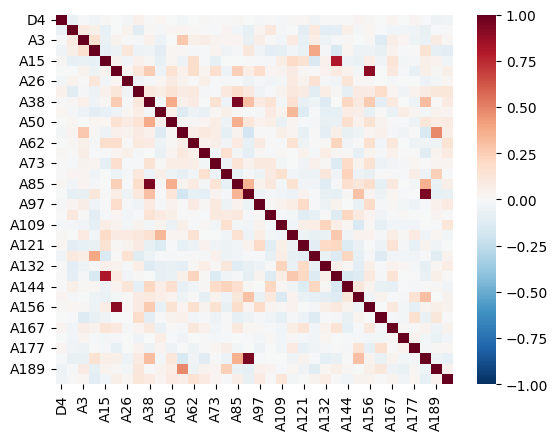

In [164]:
# Code here
# cmap='RdBu_r'  을 사용하시면 됩니다.
sns.heatmap(df.corr(numeric_only=True), cmap='RdBu_r', vmin=-1)
plt.show()

In [168]:
# Code here
B= df.corr(numeric_only=True)['Y']
B = B.loc[B.index!='Y']
B

D4     -0.063543
A3      0.088685
A9      0.057231
A15    -0.080373
A21    -0.004058
A26     0.037294
A32    -0.113119
A38     0.013124
A44    -0.022999
A50     0.021623
A56     0.027976
A62     0.011919
A67     0.000983
A73    -0.013514
A79     0.026956
A85    -0.033036
A91    -0.087829
A97     0.030628
A103    0.103960
A109   -0.022161
A115   -0.004452
A121   -0.106248
A126    0.095512
A132   -0.102385
A138   -0.095998
A144    0.058728
A150   -0.020009
A156    0.023067
A161   -0.013088
A167   -0.035565
A172   -0.036608
A177   -0.043141
A183   -0.072359
A189   -0.012520
A195    0.001255
Name: Y, dtype: float64

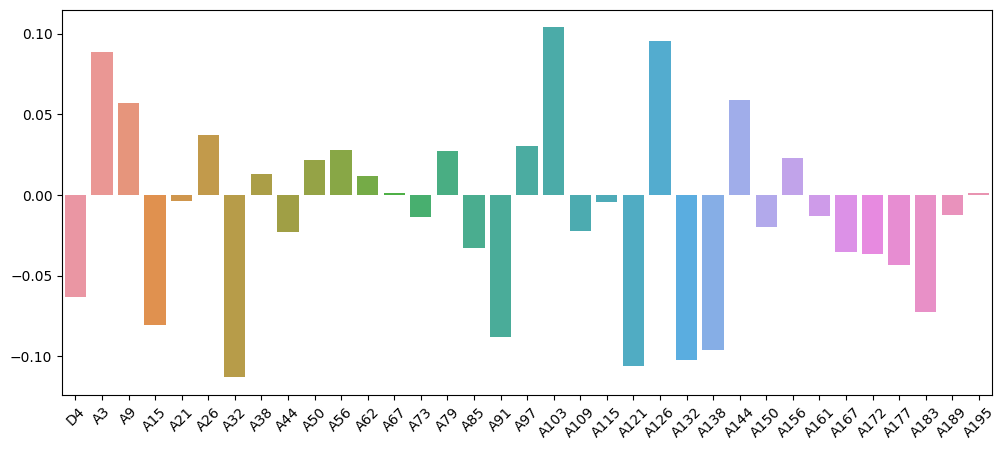

In [180]:
# Code here
plt.figure(figsize=(12,5))
sns.barplot(x=B.index, y=B.values)
plt.xticks(rotation=45)
plt.show()

### 데이터 변환
 - 범주형 데이터를 One-hot encoding을 이용하여 수치형으로 변환하세요.

In [182]:
# Code here
df = pd.get_dummies(df)
df

,D4,Y,A3,A9,A15,A21,A26,A32,A38,A44,...,A193_CHAMBER5,A193_CHAMBER6,A193_CHAMBER7,A193_CHAMBER8,A193_CHAMBER9,A196_EQ1,A196_EQ2,A196_EQ3,A196_EQ4,A196_EQ5
2,13,0.725076,60.300000,28.933333,265.766667,159.766667,96.250000,545.550000,116.933333,161.383333,...,0,0,0,0,0,0,0,1,0,0
3,8,0.569544,76.750000,46.916667,314.700000,18.600000,75.266667,201.400000,102.583333,191.066667,...,0,0,0,0,0,1,0,0,0,0
5,9,0.700685,95.016667,25.150000,379.150000,77.066667,51.183333,465.150000,321.033333,251.850000,...,0,0,0,0,0,1,0,0,0,0
6,3,1.102494,42.116667,29.250000,101.350000,24.133333,69.083333,332.433333,90.883333,165.333333,...,0,1,0,0,0,0,0,1,0,0
8,24,1.073407,62.183333,29.683333,87.800000,24.333333,41.633333,44.650000,49.483333,311.150000,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,21,1.465971,82.116667,64.283333,296.366667,10.700000,113.050000,288.750000,119.850000,128.250000,...,0,0,0,0,0,0,1,0,0,0
2372,13,0.791251,45.166667,22.633333,161.966667,68.316667,72.933333,104.033333,87.150000,346.633333,...,0,0,0,0,0,1,0,0,0,0
2373,13,0.765793,224.900000,27.733333,165.383333,65.316667,322.633333,208.050000,103.983333,411.966667,...,0,0,1,0,0,1,0,0,0,0
2374,5,0.891977,74.533333,33.466667,404.233333,69.550000,169.483333,255.850000,54.650000,320.683333,...,0,0,0,0,0,1,0,0,0,0


### 데이터 재확인
 - df의 정보를 출력하세요.
 - df의 전체 결측치를 조회하세요.

In [188]:
# Code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262 entries, 2 to 2377
Columns: 1872 entries, D4 to A196_EQ5
dtypes: float64(35), int64(1), uint8(1836)
memory usage: 2.6 MB


In [189]:
# Code here
df.isna().sum().sum()

0

### 학습 데이터 준비
 - df를 X와 Y로 분리하세요.
   - X: 'Y'를 제외한 모든 열
   - Y: 'Y'

In [192]:
# Code here
X = df.loc[:,df.columns!='Y']
X

,D4,A3,A9,A15,A21,A26,A32,A38,A44,A50,...,A193_CHAMBER5,A193_CHAMBER6,A193_CHAMBER7,A193_CHAMBER8,A193_CHAMBER9,A196_EQ1,A196_EQ2,A196_EQ3,A196_EQ4,A196_EQ5
2,13,60.300000,28.933333,265.766667,159.766667,96.250000,545.550000,116.933333,161.383333,155.633333,...,0,0,0,0,0,0,0,1,0,0
3,8,76.750000,46.916667,314.700000,18.600000,75.266667,201.400000,102.583333,191.066667,267.066667,...,0,0,0,0,0,1,0,0,0,0
5,9,95.016667,25.150000,379.150000,77.066667,51.183333,465.150000,321.033333,251.850000,354.283333,...,0,0,0,0,0,1,0,0,0,0
6,3,42.116667,29.250000,101.350000,24.133333,69.083333,332.433333,90.883333,165.333333,618.833333,...,0,1,0,0,0,0,0,1,0,0
8,24,62.183333,29.683333,87.800000,24.333333,41.633333,44.650000,49.483333,311.150000,85.383333,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,21,82.116667,64.283333,296.366667,10.700000,113.050000,288.750000,119.850000,128.250000,155.216667,...,0,0,0,0,0,0,1,0,0,0
2372,13,45.166667,22.633333,161.966667,68.316667,72.933333,104.033333,87.150000,346.633333,321.966667,...,0,0,0,0,0,1,0,0,0,0
2373,13,224.900000,27.733333,165.383333,65.316667,322.633333,208.050000,103.983333,411.966667,222.883333,...,0,0,1,0,0,1,0,0,0,0
2374,5,74.533333,33.466667,404.233333,69.550000,169.483333,255.850000,54.650000,320.683333,252.700000,...,0,0,0,0,0,1,0,0,0,0


In [200]:
# Code here
Y=df['Y']
Y

2       0.725076
3       0.569544
5       0.700685
6       1.102494
8       1.073407
          ...   
2369    1.465971
2372    0.791251
2373    0.765793
2374    0.891977
2377    0.489400
Name: Y, Length: 1262, dtype: float64

### 모델을 이용한 모델링
 - LinearRegression
 - DecisionTree

In [201]:
# 필수 모델 및 변수
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

### 데이터 분할
 - dateset을 trainset과 testset으로 분할하세요.
 - 분할 비율은 train 75 : test 25입니다.
 - random_state = 0

In [205]:
# Code here
A=train_test_split(X, Y, test_size=0.25, random_state=0)
x_train, x_test, y_train, y_test = A

### Linear Regression
 - LinearRegression 클래스를 이용하여 학습을 수행하세요.
 - 학습 데이터와 테스트 데이터의 score를 각각 출력하세요.

In [211]:
# Code here
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)
print(f'train score : {model_LR.score(x_train, y_train):.3f}') 
print(f'test score  : {model_LR.score(x_test, y_test):.3f}')

train score : 0.995
test score  : -2.350


### Decision Tree
 - DecisionTreeRegressor 클래스를 이용하여 학습을 수행하세요.
 - 학습 데이터와 테스트 데이터의 score를 각각 출력하세요.
 - random_state=0, max_depth는 자동, 13으로 각각 실행하세요.
   - max_depth=13의 결과를 저장하세요.

In [223]:
# Code here
model_DT = DecisionTreeRegressor(random_state=0)

model_DT.fit(x_train, y_train)
print(f'train score : {model_DT.score(x_train, y_train):.3f}') 
print(f'test score  : {model_DT.score(x_test, y_test):.3f}')

train score : 1.000
test score  : 0.497


In [224]:
# Code here
model_DT = DecisionTreeRegressor(max_depth = 13, random_state=0)

model_DT.fit(x_train, y_train)
print(f'train score : {model_DT.score(x_train, y_train):.3f}') 
print(f'test score  : {model_DT.score(x_test, y_test):.3f}')

train score : 0.905
test score  : 0.516


추가 검증

In [244]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=0)
[x.shape for x in [x_train, x_test, y_train, y_test]]

alpha=1000
model_ridge=Ridge(alpha=alpha)
model_ridge.fit(x_train, y_train)

print(f'train score : {model_ridge.score(x_train, y_train):.3f}') 
print(f'test score  : {model_ridge.score(x_test, y_test):.3f}')


train score : 0.885
test score  : 0.600


In [235]:
alpha=0.001
model_lasso=Lasso(alpha=alpha)
model_lasso.fit(x_train, y_train)
model_lasso.score(x_train, y_train), model_lasso.score(x_test, y_test)

print(f'train score : {model_lasso.score(x_train, y_train):.3f}') 
print(f'test score  : {model_lasso.score(x_test, y_test):.3f}')

train score : 0.966
test score  : 0.780


In [248]:
X.shape

(1262, 1871)